In [1]:
import os 
import sys
sys.path.append("/mnt/code")
from cellsystem import CellSystem
from parameters_df import *
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import special
from cellmodel import CellModel
from scipy.integrate import quad


In [2]:
def rhombusint(x0,x1,xvec,yvec):
    
    # first we sort out whether all values are within bounds
    if x0< xvec[0] or x1 < xvec[0]:
        print("your values are below the lower boundary")
        return("error")
    if x0 > xvec[-1] or x1 > xvec[-1]:
        print("your values are over the upper boundary")
        return("error")
    
    # then we find theboundary values
    mindex=abs(xvec-x0).argmin()
    maxdex=abs(xvec-x1).argmin()
    if xvec[mindex]>x0:
        mindex-=1
    if xvec[maxdex]<x1:
        maxdex+=1
    # we make two sets of indexes to loop over for our lin reg and int
    outerindex=range(mindex,maxdex+1)
    xval=xvec[outerindex]
    xval[0]=x0
    xval[-1]=x1
    
    # we do our lin approx and integral
    intsum=0
    
    for i in range(len(outerindex)-1):
        xs=np.array([xvec[outerindex[i]],xvec[outerindex[i+1]]])
        ys=np.array([yvec[outerindex[i]],yvec[outerindex[i+1]]])*xs**2

        # we dont just want the spacial integral, we want the sphere
        def rhombfunc(x):
            return (((ys[1]-ys[0])/(xs[1]-xs[0])+ys[0])*(x-xs[0]))*4*np.pi
        intsum+=quad(rhombfunc,xval[i],xval[i+1])[0]
    return intsum/(10**15)

In [3]:
all_parameters=[]
all_parameters.append(Parameters())
CellSystems=[]
CellSystems.append(CellSystem(all_parameters[0]))
CellSystems[-1].read_file("Results/fulldifrunstart120s.txt")

# time indices =45
doing ti=0


# time indices =45
doing ti=0
K_RL=10.0
K_GRL=0.1
decay=1.925408834888737e-05
clearance=0.0001925408834888737
length of simulation region in micron is 600


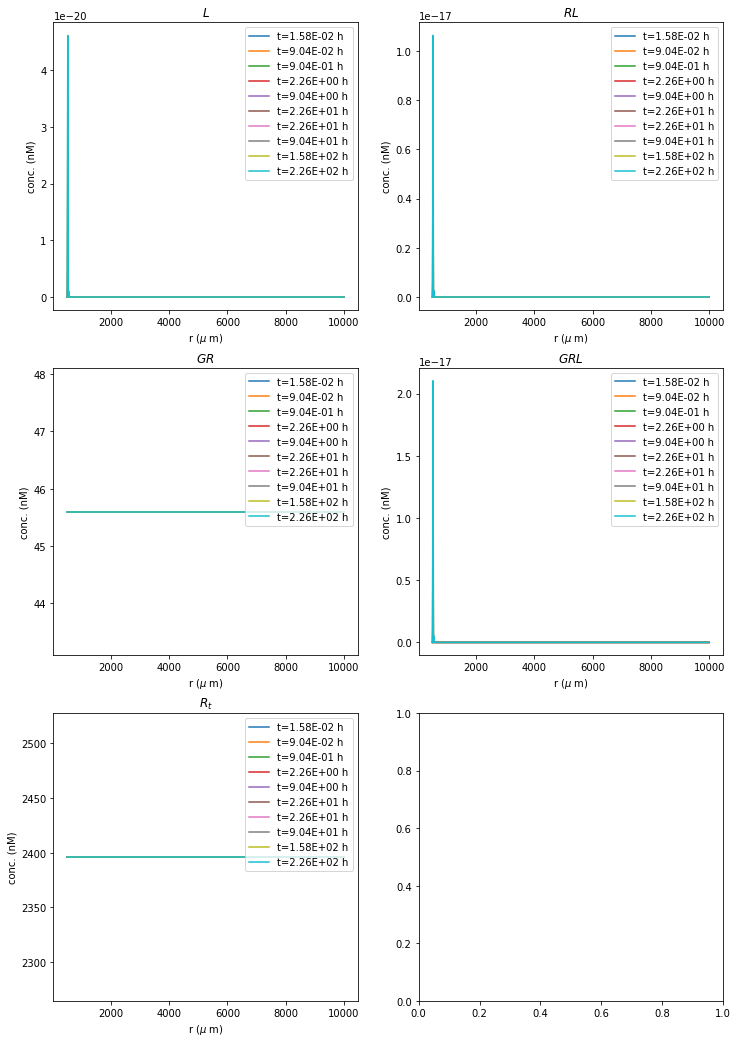

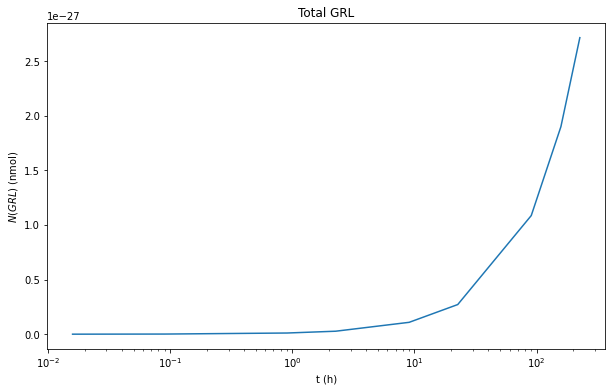

In [4]:
test=CellSystem(all_parameters[0])
test.read_file("Results/fulldifrunstart120s.txt")
indices=test.find_indices(np.array([1/60,5/60,1,5,12,24,24*2,24*4,24*6]))
print("K_RL={}".format(test.P.get("K_RL")))
print("K_GRL={}".format(test.P.get("K_GRL")))
print("decay={}".format(test.P.get("decay")))
print("clearance={}".format(test.P.get("clearance_rate")))
test.plot(indices=indices)

# time indices =416
doing ti=0
doing ti=100
doing ti=200
doing ti=300
doing ti=400
K_RL=10.0
K_GRL=0.1
decay=1.925408834888737e-05
clearance=0.0001925408834888737
length of simulation region in micron is 600


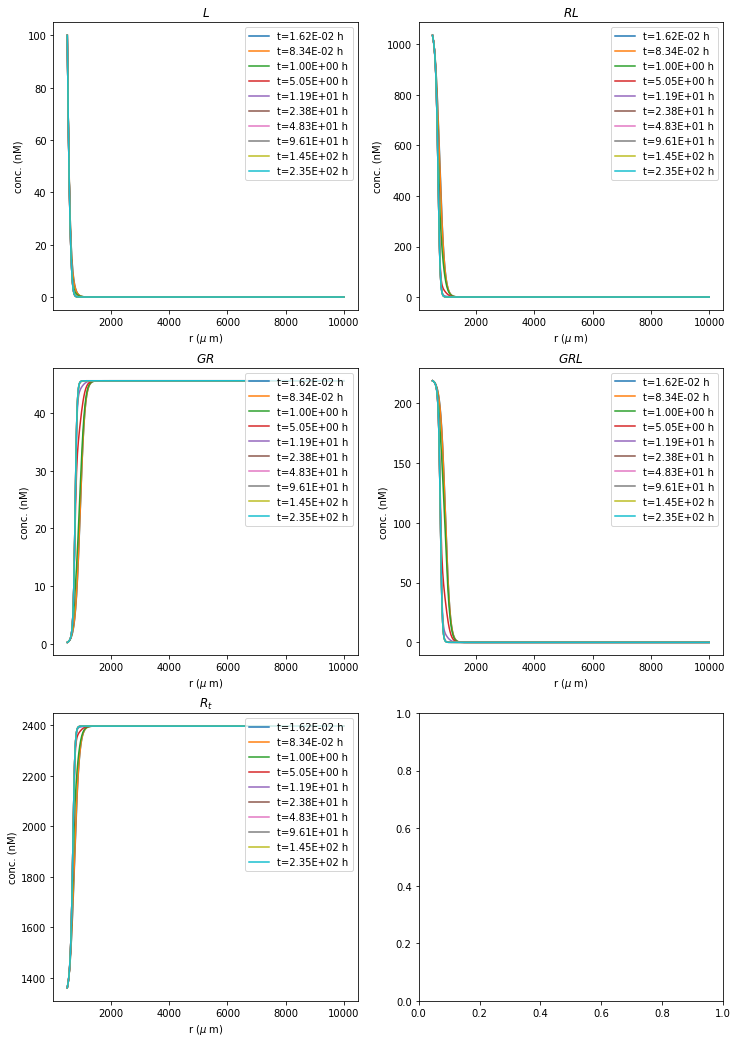

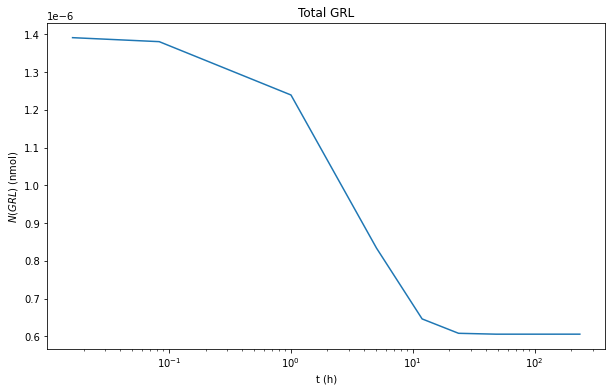

In [5]:
test2=CellSystem(all_parameters[0])
test2.read_file("Results/baselinefixed1h.txt")
indices=test2.find_indices(np.array([1/60,5/60,1,5,12,24,24*2,24*4,24*6]))
print("K_RL={}".format(test2.P.get("K_RL")))
print("K_GRL={}".format(test2.P.get("K_GRL")))
print("decay={}".format(test2.P.get("decay")))
print("clearance={}".format(test2.P.get("clearance_rate")))
test2.plot(indices=indices)

In [6]:
# note that if you do too fine increments it looks weird, we get bumps in the early calcs
startxs=np.array([0,100,200,300,400,500,600,700,800])

yvec=test2.Ltot[155,:]
xvec=r=np.arange(start=0,stop= 10.0E+6,step=10.0E+6/600)/1000
resvec=[]
for i in startxs:
    resvec.append(rhombusint(i,i+100,xvec,yvec))


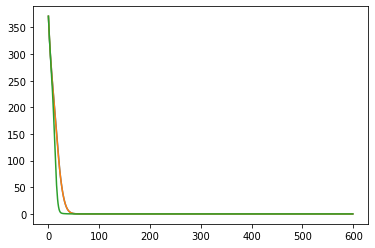

In [7]:
plt.plot(test2.Ltot[0,:])
plt.plot(test2.Ltot[50,:])
plt.plot(test2.Ltot[300,:])

Text(0, 0.5, 'Mean Concentration(nM)')

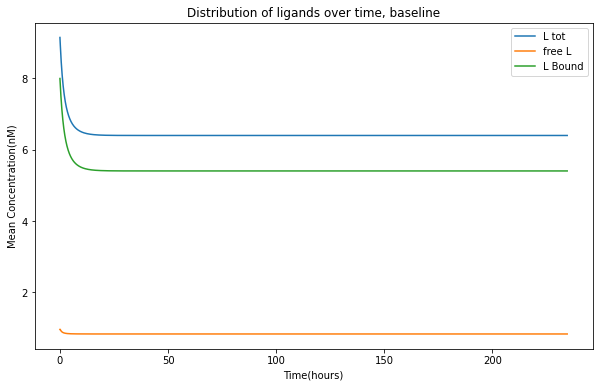

In [8]:
plt.figure(figsize=(10,6))
plt.plot(test2.T/3600,test2.Ltot.sum(axis=1)/600)
plt.plot(test2.T/3600,test2.L.sum(axis=1)/600)
plt.plot(test2.T/3600,((test2.RL.sum(axis=1)+test2.GRL.sum(axis=1))*(2*10)/100)/600)

#plt.plot(CellSystems[0].RL.sum(axis=1))
#plt.plot(CellSystems[0].GRL.sum(axis=1))

plt.legend(["L tot","free L","L Bound"])
plt.title("Distribution of ligands over time, baseline")
plt.xlabel("Time(hours)")
plt.ylabel("Mean Concentration(nM)")

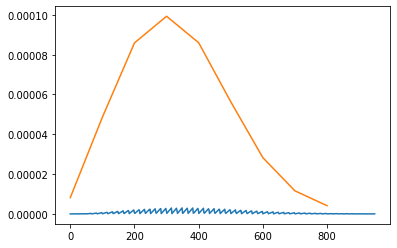

In [9]:
startxstest=np.arange(start=0,stop= 950,step=950/600)
resvectest=[]
for i in startxstest:
    resvectest.append(rhombusint(i,i+startxstest[1],xvec,yvec))
plt.plot(startxstest,resvectest,startxs,resvec)
# this is very clearly wrong
# think about it for a while signe.

In [10]:
yvec=test2.Ltot[295,:]
xvec=r=np.arange(start=0,stop= 10.0E+6,step=10.0E+6/600)/1000
resvec2=[]
for i in startxs:
    resvec2.append(rhombusint(i,i+100,xvec,yvec))

In [11]:
yvec=test2.Ltot[350,:]
xvec=np.arange(start=0,stop= 10.0E+6,step=10.0E+6/600)/1000
resvec3=[]
for i in startxs:
    resvec3.append(rhombusint(i,i+100,xvec,yvec))

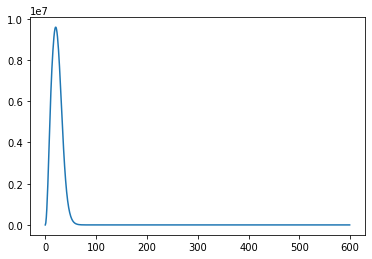

In [12]:
plt.plot(test2.Ltot[155,:]*xvec**2)


In [13]:
# finer distrubution, 
# equib distrib of diffusion from the A*exp(-z/charlengt)
# or int by multiply 4PI z^2

# time indices =340
doing ti=0
doing ti=100
doing ti=200
doing ti=300
K_RL=10.0
K_GRL=0.1
decay=1.925408834888737e-05
clearance=9.627044174443685e-05
length of simulation region in micron is 600


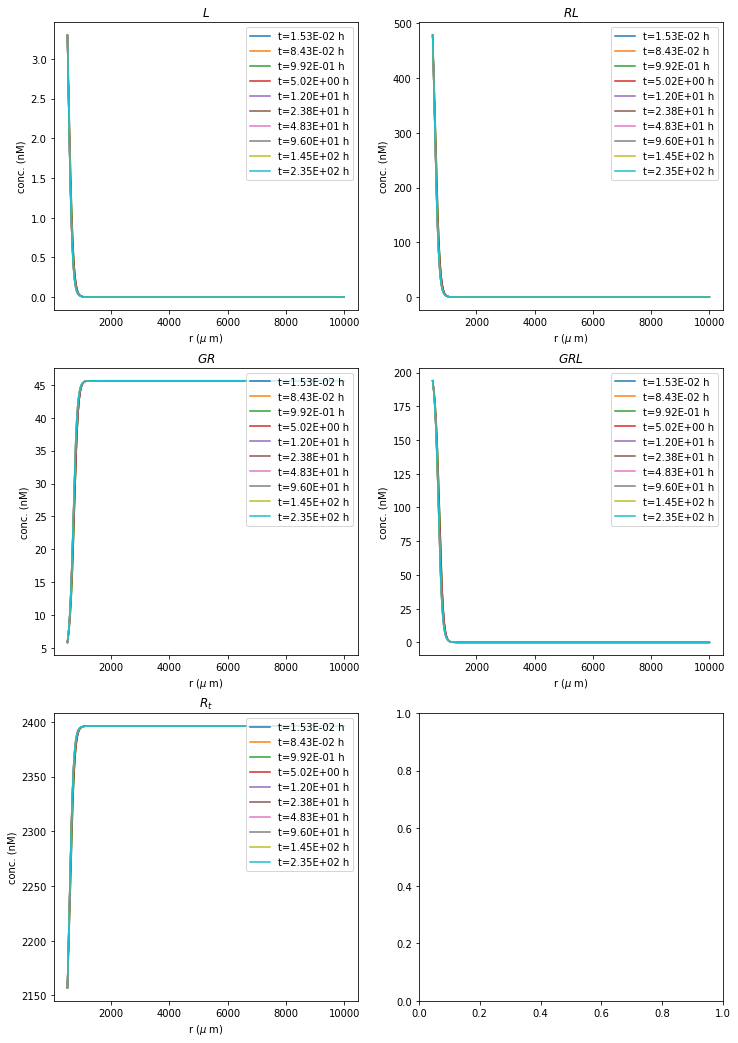

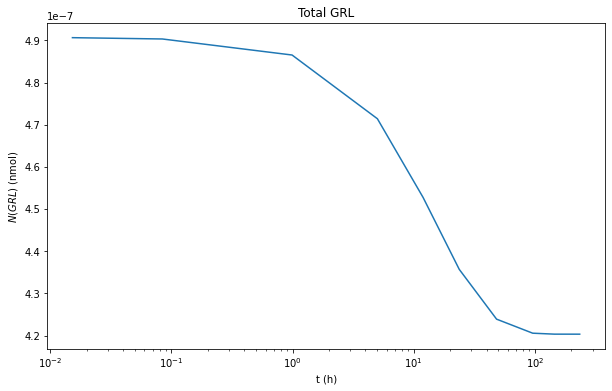

In [14]:
all_parameters.append(Parameters())
all_parameters[1].set("clearance_rate", 0.0001925408834888737/2)
test3=CellSystem(all_parameters[1])
test3.read_file("Results/halfclear1hdif.txt")
indices=test3.find_indices(np.array([1/60,5/60,1,5,12,24,24*2,24*4,24*6]))
print("K_RL={}".format(test3.P.get("K_RL")))
print("K_GRL={}".format(test3.P.get("K_GRL")))
print("decay={}".format(test3.P.get("decay")))
print("clearance={}".format(test3.P.get("clearance_rate")))
test3.plot(indices=indices)

In [15]:
       # k_d_poor=self.get('K_RL')/self.get('K_GRL')*self.get('k_d_fixed')
        #k_a=self.get('k_d_fixed')/self.get('K_GRL')
       # K_RL_clearance=(k_d_poor+self.get('clearance_rate'))/k_a
kdp=10/0.1 *np.log(2)/(2*3600)
ka=(2*3600)/0.1
krl=(kdp+np.log(2)/(3600))/ka
krl

1.3638312580461887e-07

Text(0, 0.5, 'Mean Concentration(nM)')

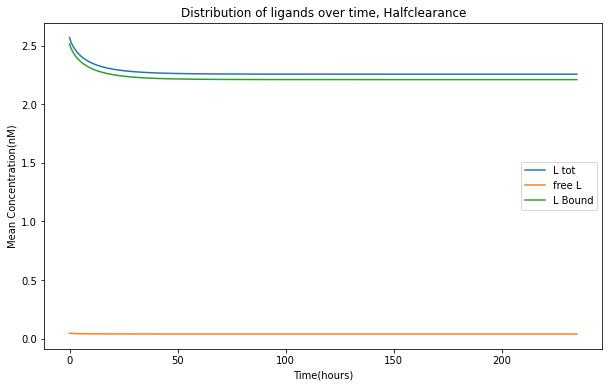

In [24]:
plt.figure(figsize=(10,6))
plt.plot(test3.T/3600,test3.Ltot.sum(axis=1)/600)
plt.plot(test3.T/3600,test3.L.sum(axis=1)/600)
plt.plot(test3.T/3600,((test3.RL.sum(axis=1)+test3.GRL.sum(axis=1))*(2*10)/100)/600)

#plt.plot(CellSystems[0].RL.sum(axis=1))
#plt.plot(CellSystems[0].GRL.sum(axis=1))

plt.legend(["L tot","free L","L Bound"])
plt.title("Distribution of ligands over time, Halfclearance")
plt.xlabel("Time(hours)")
plt.ylabel("Mean Concentration(nM)")

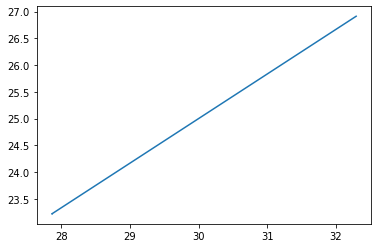

In [33]:
plt.plot(test3.Ltot.sum(axis=1)-(test3.RL.sum(axis=1)+test3.GRL.sum(axis=1))*(2*10)/100,test3.L.sum(axis=1))

# time indices =403
doing ti=0
doing ti=100
doing ti=200
doing ti=300
doing ti=400
K_RL=10.0
K_GRL=0.1
decay=1.925408834888737e-05
clearance=0.0001925408834888737
length of simulation region in micron is 600


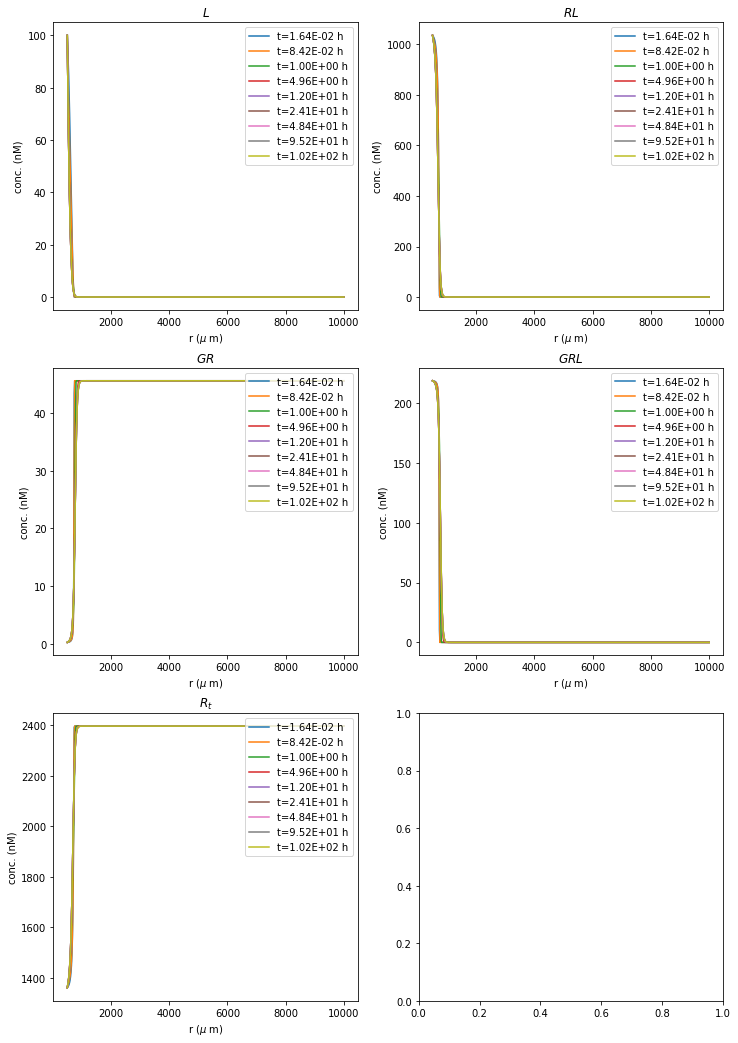

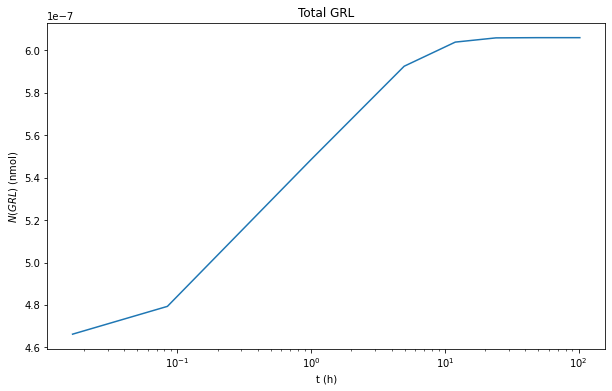

In [16]:
# soft parameters
test5=CellSystem(all_parameters[0])
test5.read_file("Results/softprof6d.txt")
indices=test5.find_indices(np.array([1/60,5/60,1,5,12,24,24*2,24*4,24*6]))
print("K_RL={}".format(test5.P.get("K_RL")))
print("K_GRL={}".format(test5.P.get("K_GRL")))
print("decay={}".format(test5.P.get("decay")))
print("clearance={}".format(test5.P.get("clearance_rate")))
test5.plot(indices=indices)

In [17]:
test5.T[246]


10893.265290149202

Text(0, 0.5, 'Mean Concentration(nM)')

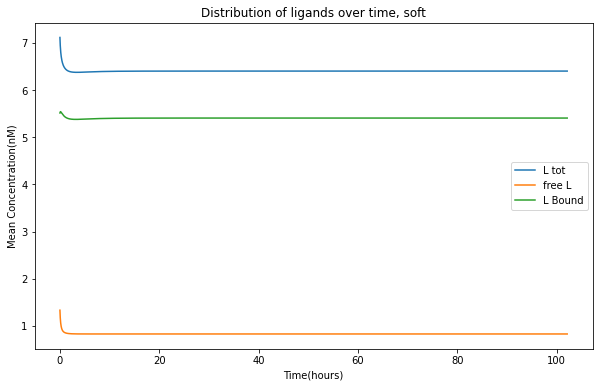

In [21]:
plt.figure(figsize=(10,6))
plt.plot(test5.T/3600,test5.Ltot.sum(axis=1)/600)
plt.plot(test5.T/3600,test5.L.sum(axis=1)/600)
plt.plot(test5.T/3600,((test5.RL.sum(axis=1)+test5.GRL.sum(axis=1))*(2*10)/100)/600)

#plt.plot(CellSystems[0].RL.sum(axis=1))
#plt.plot(CellSystems[0].GRL.sum(axis=1))

plt.legend(["L tot","free L","L Bound"])
plt.title("Distribution of ligands over time, soft")
plt.xlabel("Time(hours)")
plt.ylabel("Mean Concentration(nM)")

Text(0, 0.5, 'Ligand total (nmol)')

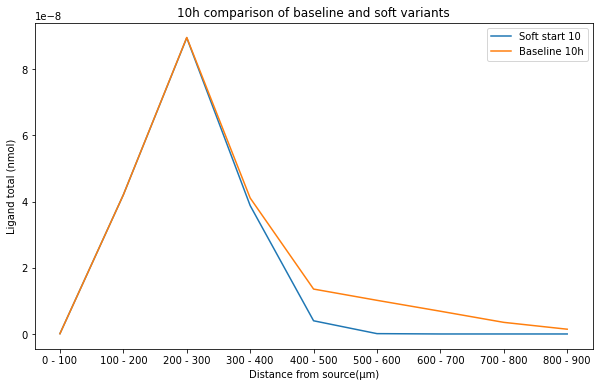

In [18]:
xvec=r=np.arange(start=0,stop= 10.0E+6,step=10.0E+6/600)/1000
yvec1=test5.Ltot[300,:]
ressoft=[]
for i in startxs:
    ressoft.append(rhombusint(i,i+startxstest[1],xvec,yvec1))
yvec2=test2.Ltot[278,:]
resbase=[]
for i in startxs:
    resbase.append(rhombusint(i,i+startxstest[1],xvec,yvec2))  
    
plt.figure(figsize=(10,6))
plt.plot(startxs,ressoft,startxs,resbase)
plt.title("10h comparison of baseline and soft variants")
plt.xticks(np.arange(0, 900, step=100), labels=["{z} - {y}".format(z=i,y=i+100) for i in startxs])
plt.legend(["Soft start 10","Baseline 10h"])
plt.xlabel("Distance from source(μm)")
plt.ylabel("Ligand total (nmol)")